In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import cross_validate
import bamboolib as bam

In [2]:
# Import model

expected_model_version = '1.0'
model_path = r'C:\Users\1\Documents\GitHub\Github_Springboard\DataScienceGuidedCapstone-master\Step Five - Modeling\models\ski_resort_pricing_model.pkl'
if os.path.exists(model_path):
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    if model.version != expected_model_version:
        print("Expected model version doesn't match version loaded")
    if model.sklearn_version != sklearn_version:
        print("Warning: model created under different sklearn version")
else:
    print("Expected model not found")

In [3]:
# Import data
ski_data = pd.read_csv(r'C:\Users\1\Documents\GitHub\Github_Springboard\DataScienceGuidedCapstone-master\Step Four - Preprocessing and Training\data\ski_data_step4_features.csv')

In [4]:
# Define subset for plot data
dfPlot = ski_data.copy()

In [5]:
# Subset rows for plot data
dfPlot.dropna(subset=['AdultWeekend'], inplace=True)

In [6]:
# Subset cols for model prediction
x_features = dfPlot.set_index(['Name','Region','state']).copy()
x_bmr = x_features.loc['Big Mountain Resort',model.X_columns].copy()

In [7]:
# Define model plot parameters
modelPlotCount = 100
maxVals = x_features.max()
minVals = x_features.min()
plotInterval = (maxVals - minVals) / modelPlotCount
xColsCount = len(model.X_columns)

In [8]:
# Define empty DataFrames for iterating through model prediction scenarios
df = pd.DataFrame(index=[i for i in range(0,modelPlotCount)], columns = model.X_columns, dtype=float).copy()
x_modelVars = df.copy()
y_modelOutput = df.copy()

In [9]:
# Populate x_modelVars with feature variables at each interval
x_modelVars.iloc[0,:] = minVals
for i in range(1,modelPlotCount):
    x_modelVars.iloc[i,:] = x_modelVars.iloc[i-1,:] + plotInterval

In [10]:
# Populate y_modelOutput with adjusted predictions for each value in x_modelVars
for col in range(0,xColsCount):
    for row in range(0,modelPlotCount):
        x_bmrMod = x_bmr.copy()
        x_bmrMod.iloc[0,col] = x_modelVars.iloc[row,col]
        y_modelOutput.iloc[row,col] = model.predict(x_bmrMod).item()
        #print('r' + str(row))
    print('c' + str(col))

c0
c1
c2
c3
c4
c5
c6
c7
c8
c9
c10
c11
c12
c13
c14
c15
c16
c17
c18
c19
c20
c21
c22
c23
c24
c25
c26
c27
c28
c29
c30
c31


In [20]:
x_bmr.T

Region,Montana
state,Montana
summit_elev,6817.000000
vertical_drop,2353.000000
base_elev,4464.000000
trams,0.000000
fastSixes,0.000000
fastQuads,3.000000
quad,2.000000
triple,6.000000
double,0.000000


In [19]:
x_modelVars

,summit_elev,vertical_drop,base_elev,trams,fastSixes,fastQuads,quad,triple,double,surface,...,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile,resort_skiable_area_ac_state_ratio,resort_days_open_state_ratio,resort_terrain_park_state_ratio,resort_night_skiing_state_ratio
0,440.00,60.00,100.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,69.00,1.0,0.00,0.014643,0.450867,0.001145,0.002542,0.012346,0.003115
1,570.47,103.65,207.0,0.03,0.02,0.15,0.08,0.08,0.14,0.09,...,436.82,100.89,1.8,28.36,0.038536,2.157772,0.011133,0.012517,0.022222,0.013084
2,700.94,147.30,314.0,0.06,0.04,0.30,0.16,0.16,0.28,0.18,...,873.64,132.78,2.6,56.72,0.062428,3.864676,0.021122,0.022492,0.032099,0.023053
3,831.41,190.95,421.0,0.09,0.06,0.45,0.24,0.24,0.42,0.27,...,1310.46,164.67,3.4,85.08,0.086320,5.571580,0.031110,0.032466,0.041975,0.033022
4,961.88,234.60,528.0,0.12,0.08,0.60,0.32,0.32,0.56,0.36,...,1747.28,196.56,4.2,113.44,0.110213,7.278485,0.041099,0.042441,0.051852,0.042991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,12834.65,4206.75,10265.0,2.85,1.90,14.25,7.60,7.60,13.30,8.55,...,41497.90,3098.55,77.0,2694.20,2.284426,162.606777,0.950057,0.950127,0.950617,0.950156
96,12965.12,4250.40,10372.0,2.88,1.92,14.40,7.68,7.68,13.44,8.64,...,41934.72,3130.44,77.8,2722.56,2.308319,164.313681,0.960046,0.960102,0.960494,0.960125
97,13095.59,4294.05,10479.0,2.91,1.94,14.55,7.76,7.76,13.58,8.73,...,42371.54,3162.33,78.6,2750.92,2.332211,166.020586,0.970034,0.970076,0.970370,0.970093
98,13226.06,4337.70,10586.0,2.94,1.96,14.70,7.84,7.84,13.72,8.82,...,42808.36,3194.22,79.4,2779.28,2.356104,167.727490,0.980023,0.980051,0.980247,0.980062


In [18]:
y_modelOutput

,summit_elev,vertical_drop,base_elev,trams,fastSixes,fastQuads,quad,triple,double,surface,...,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile,resort_skiable_area_ac_state_ratio,resort_days_open_state_ratio,resort_terrain_park_state_ratio,resort_night_skiing_state_ratio
0,91.21839,90.1314,91.91099,91.7842,91.7842,83.93881,90.7630,91.09619,91.78420,91.4812,...,92.93319,91.7522,92.1392,97.95299,92.7192,91.95920,90.89920,92.8282,91.9456,91.6154
1,91.21839,90.1314,91.91099,91.7842,91.7842,83.93881,90.7630,91.09619,91.78420,91.4812,...,92.94719,91.7522,92.1392,93.11999,92.7192,91.95920,90.89920,92.8282,91.9396,91.6154
2,91.21839,90.1314,91.91099,91.7842,91.7842,83.93881,90.7630,91.09619,91.78420,91.4812,...,92.94719,91.7522,92.1392,93.09999,92.7142,91.99920,90.88220,92.8282,91.9396,91.6154
3,91.21839,90.1314,91.91099,91.7842,91.7842,83.93881,90.7630,91.09619,91.78420,91.4812,...,92.96119,91.7522,92.1392,93.13899,92.7142,91.81520,91.14820,92.8282,91.8236,91.6154
4,91.21839,90.1314,91.91099,91.7842,91.7842,91.69940,90.7630,91.09619,91.60519,91.4812,...,93.00719,91.7522,92.1392,93.12699,92.7462,91.81520,91.35920,92.8702,91.8146,91.6094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,93.28420,100.4460,91.79920,92.3022,93.7282,123.42200,91.6992,91.78420,91.77219,92.1942,...,91.97520,92.3304,91.7562,91.86520,91.8112,92.23919,93.58317,91.9012,92.0742,91.7842
96,93.28420,100.4460,91.79920,92.3022,93.7282,123.42200,91.6992,91.78420,91.77219,92.1942,...,91.97520,92.3304,91.7332,91.86520,91.8112,92.23919,93.58317,91.9012,92.0742,91.7842
97,93.29020,100.4460,91.79920,92.3022,93.7282,123.42200,91.6992,91.78420,91.77219,92.1942,...,91.97520,92.3304,91.7332,91.86520,91.8112,92.23919,93.58317,91.9012,92.0742,91.7802
98,93.29020,100.4460,91.79920,92.3022,93.7282,123.42200,91.6992,91.78420,91.77219,92.1942,...,91.97520,92.3304,91.7332,91.86520,91.8112,92.23919,93.58317,91.9012,92.0742,91.7802


In [12]:
# Define plot data view
sPlotData = dfPlot.copy()
sPlotData = sPlotData.set_index('Name')

In [13]:
# Define hue conditions
def setHue(state):
    if state == 'Montana': return 'Montana'
    elif state in ['Idaho','Wyoming','North Dakota','South Dakota']: return 'Adjacent State'
    else: return 'Other'

In [14]:
# Determine hue via mapping state conditions
sPlotData['hue'] = sPlotData['state'].apply(setHue)
sPlotData.loc['Big Mountain Resort','hue'] = 'Big Mountain Resort'

In [15]:
# Define point size, prominent for Big Mountain Resort
sPlotData['PointSize'] = 0
sPlotData.loc['Big Mountain Resort','PointSize'] = 5

In [16]:
# Define plot function, price vs feature
def plotPrice(feature):

    sb.set_context("talk", font_scale=1.1)
    plt.figure(figsize=(20,10))

    modelLine = pd.DataFrame(index = x_modelVars.index,dtype=float)
    modelLine['y'] = y_modelOutput[feature]
    modelLine['x'] = x_modelVars[feature]

    sb.lineplot(x='x', y='y', data=modelLine, color='r')
    sb.scatterplot(x=feature, y='AdultWeekend', hue='hue', data=sPlotData, size='PointSize')

    plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
    plt.tight_layout()
    plt.savefig("default_legend_position_Seaborn_scatterplot.png", format='png',dpi=150)

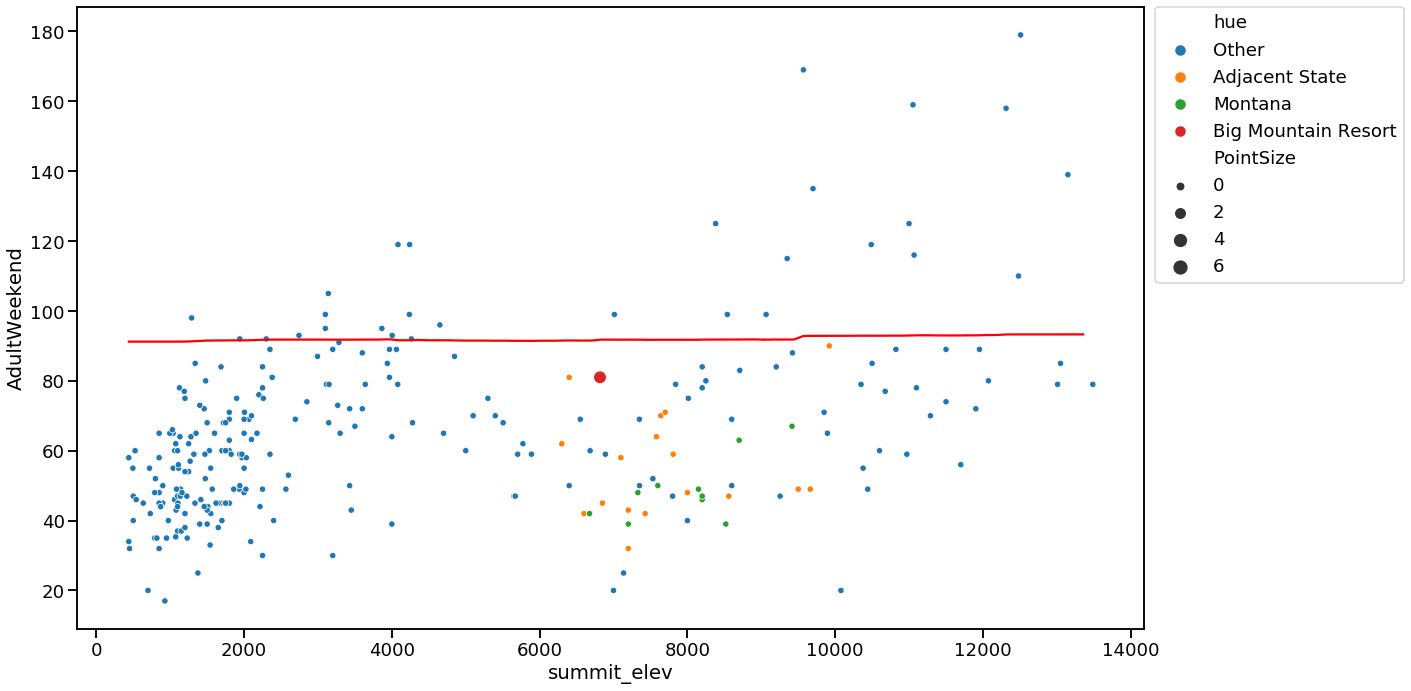

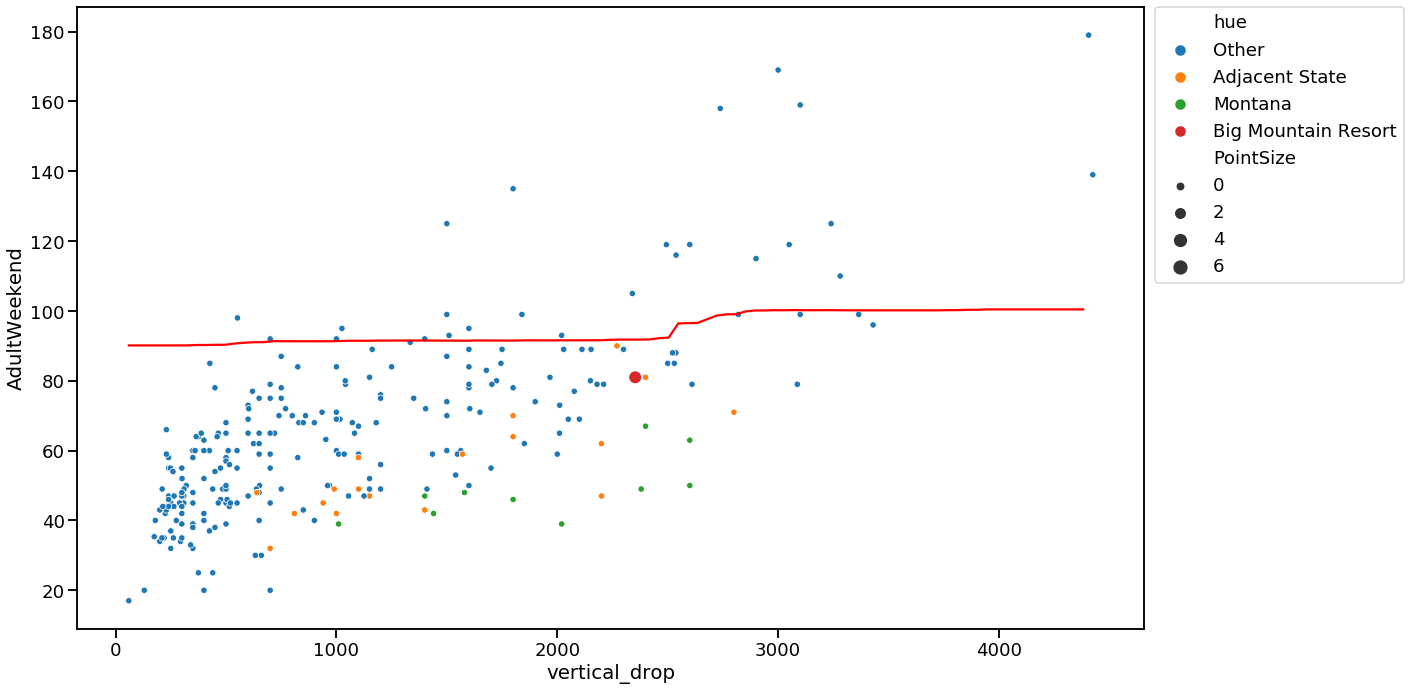

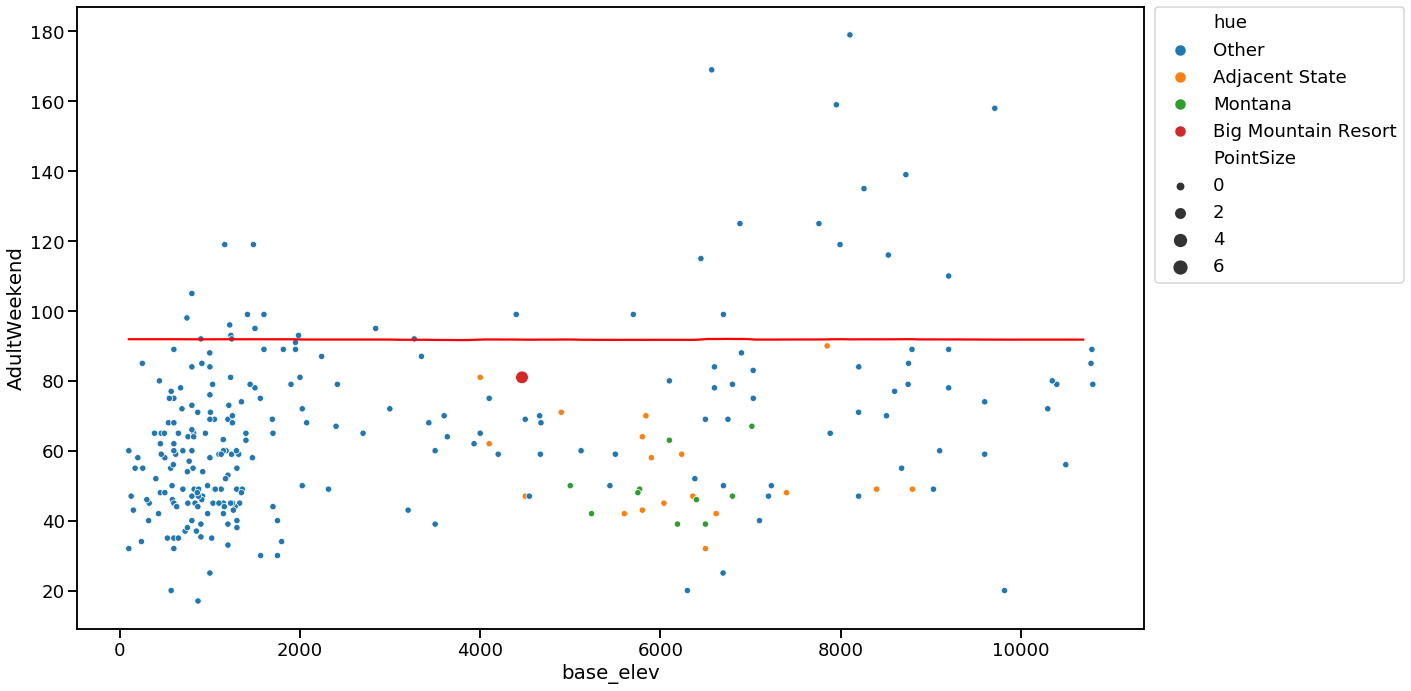

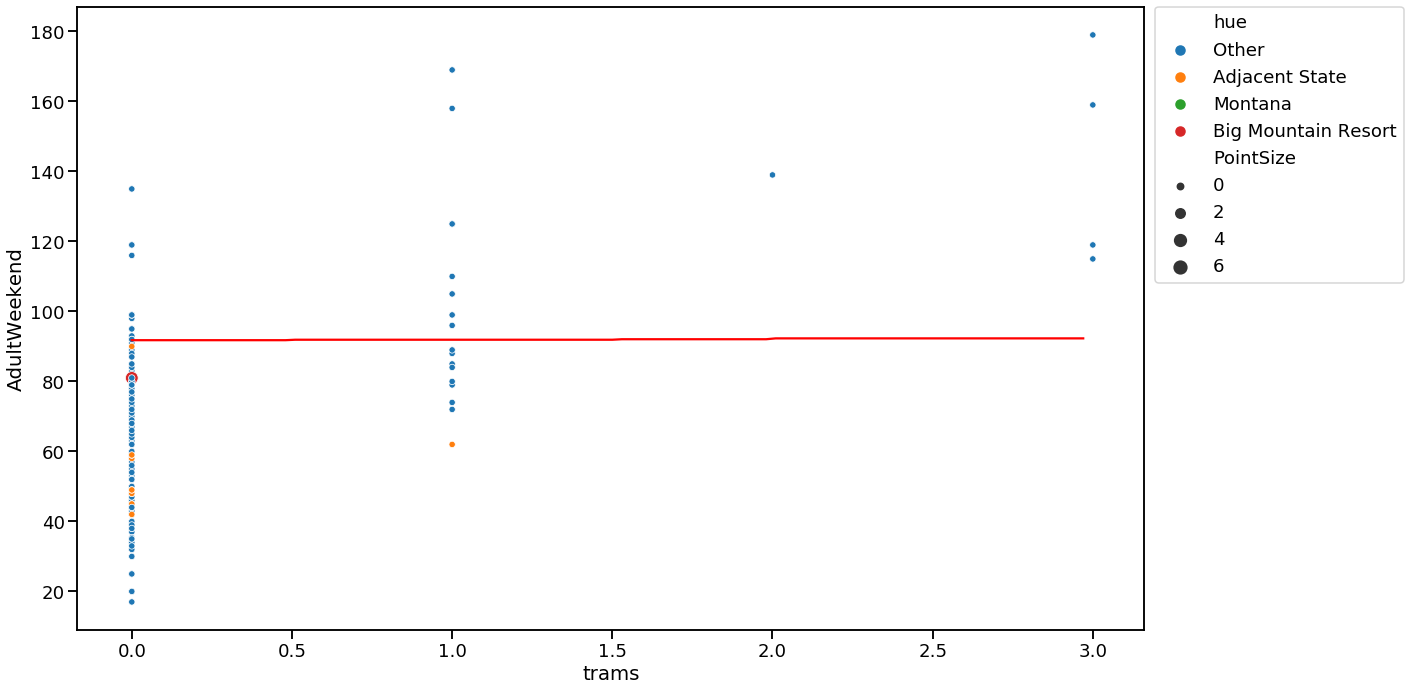

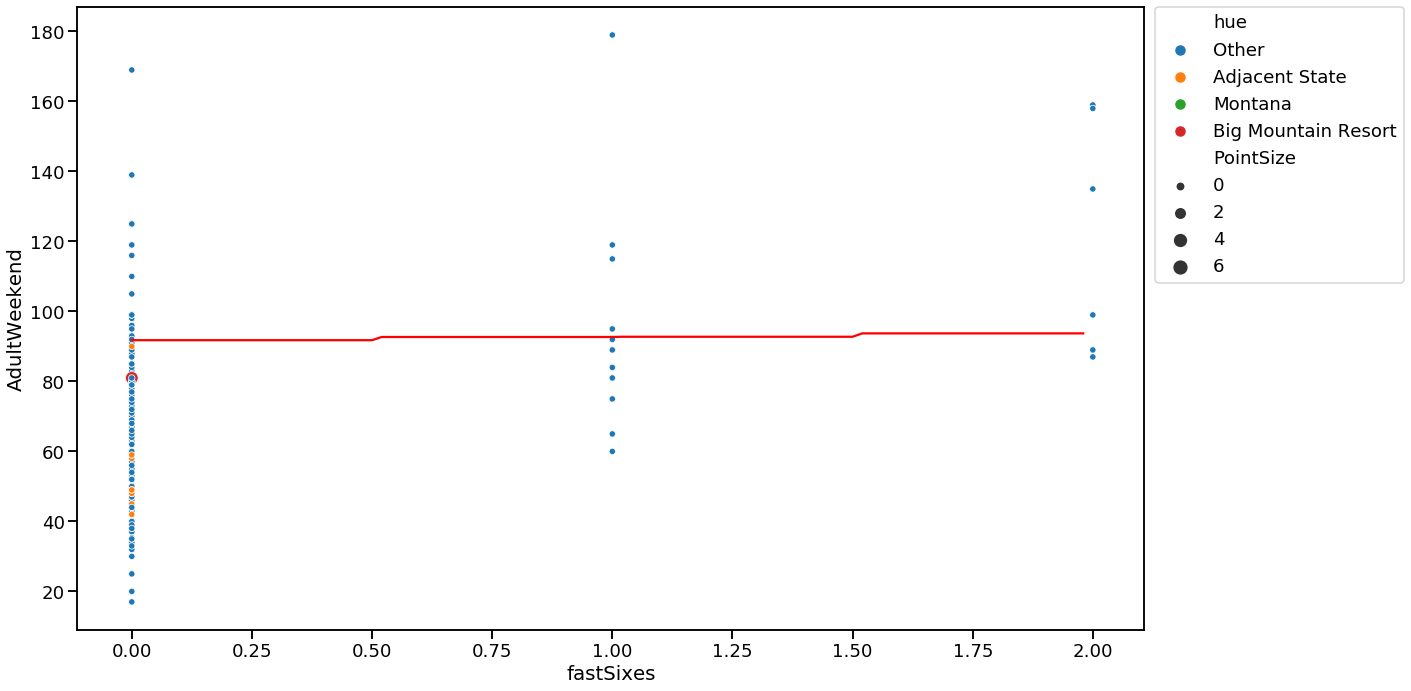

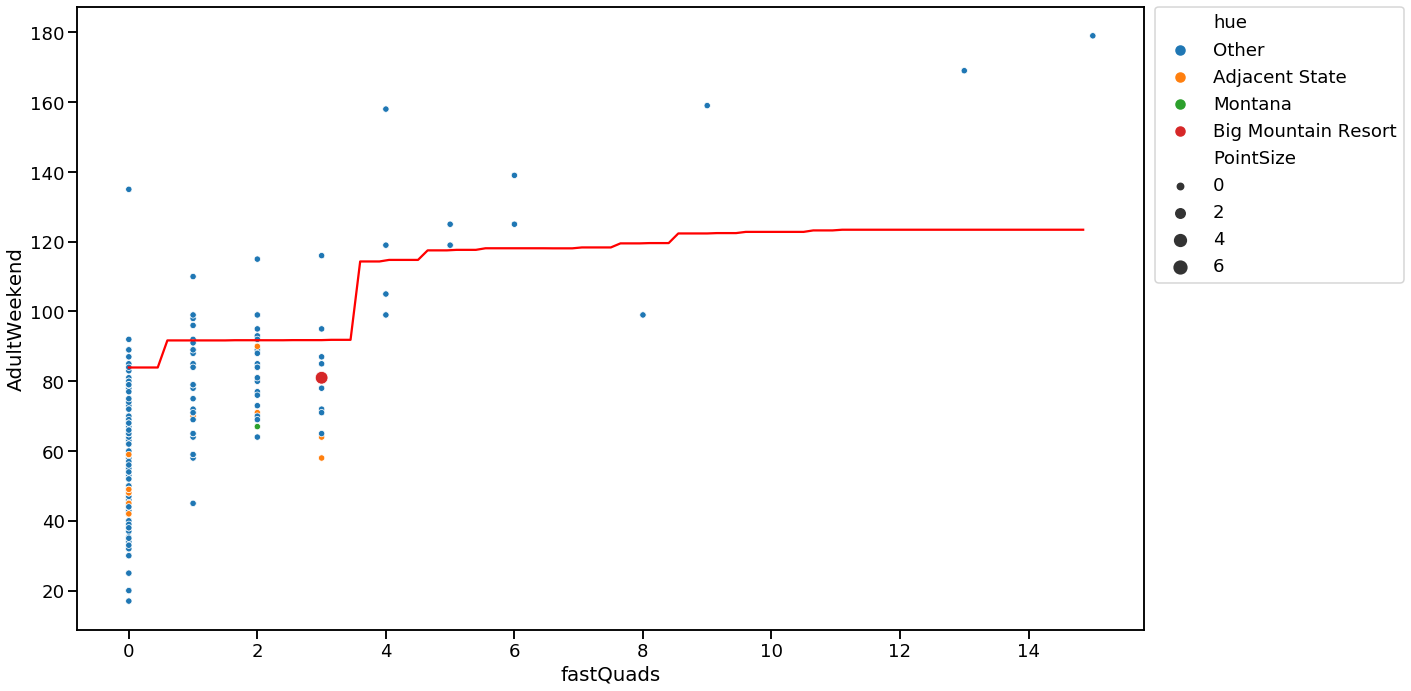

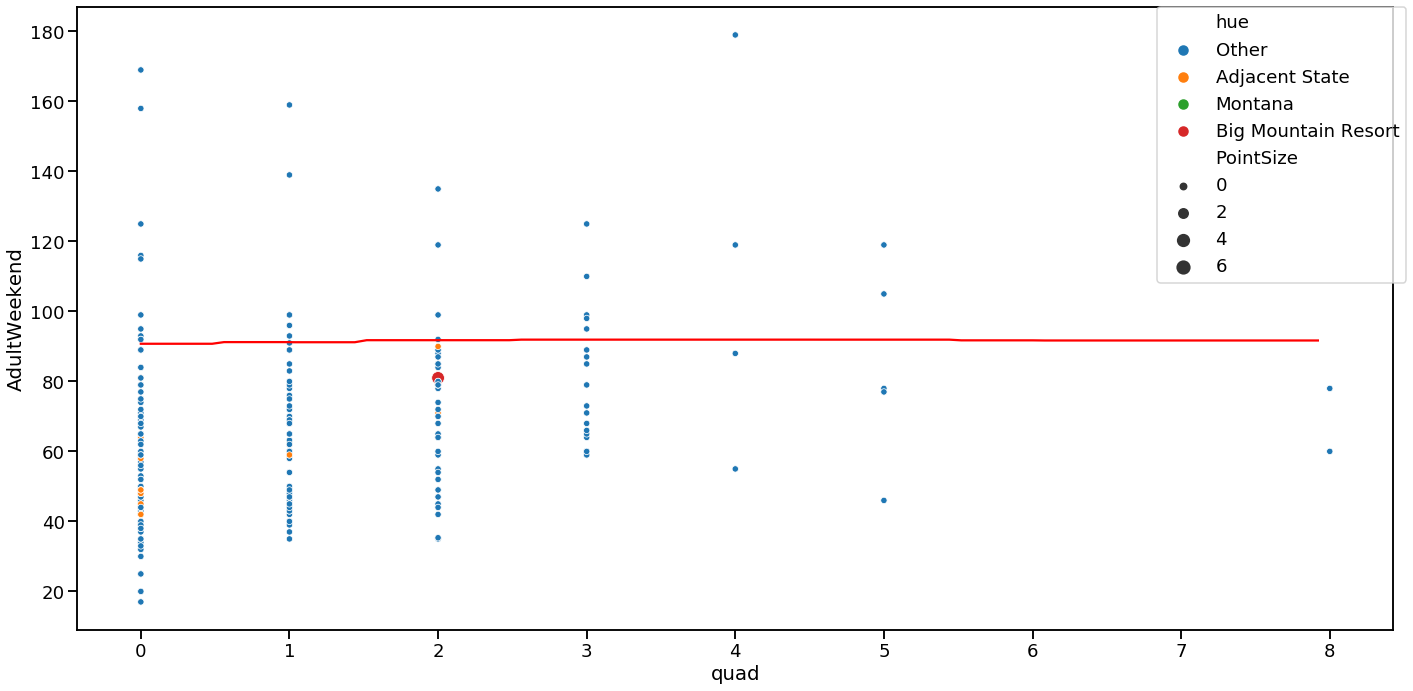

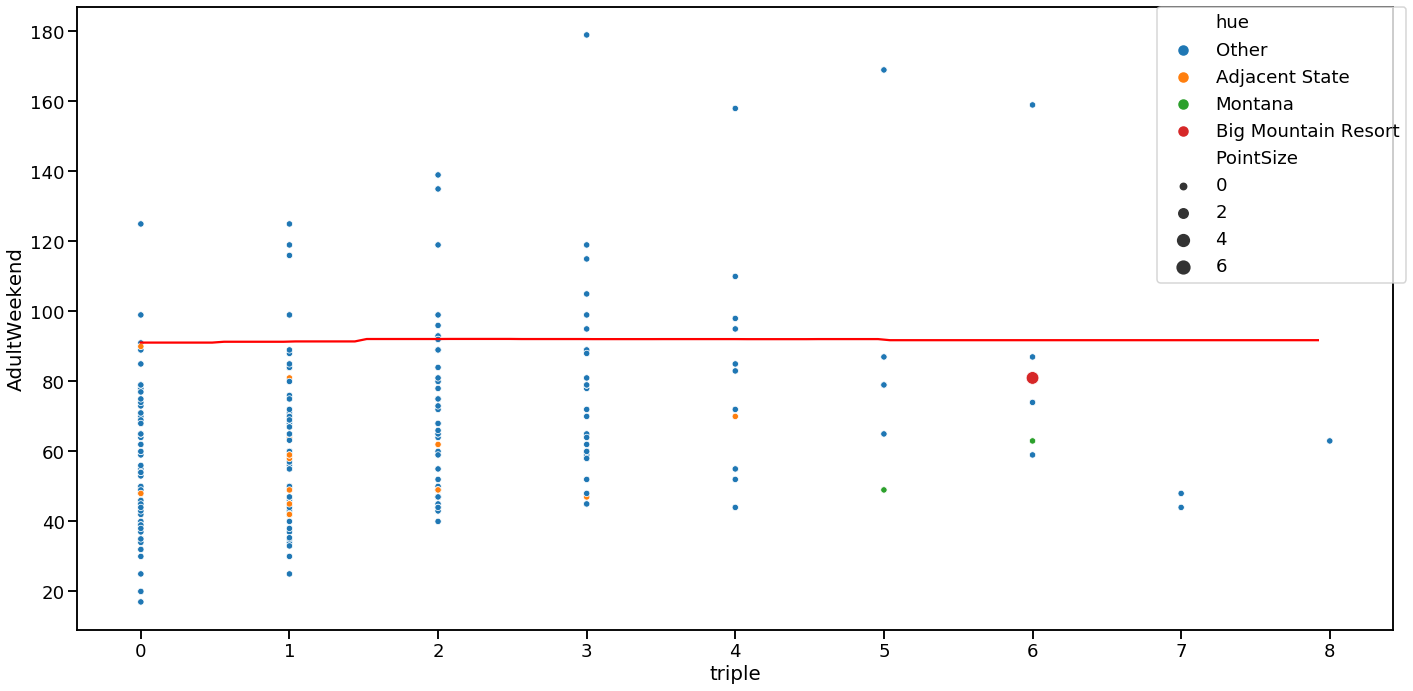

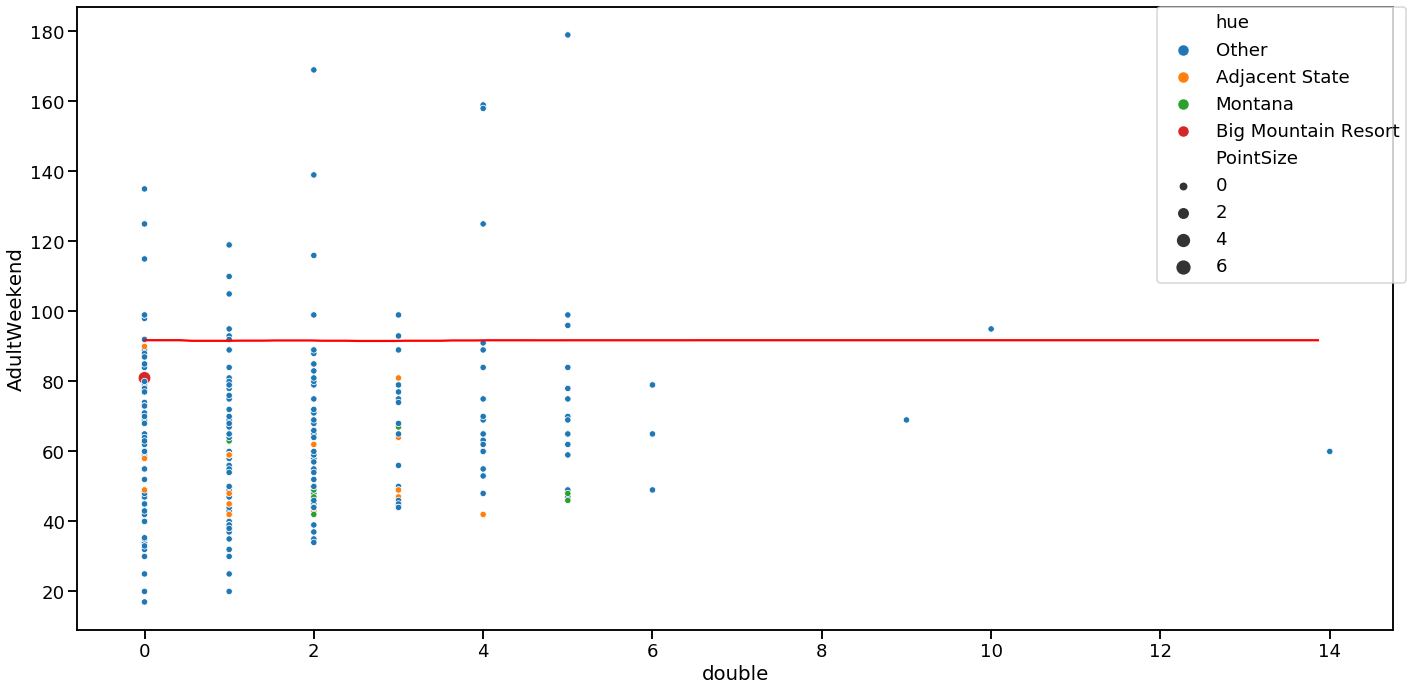

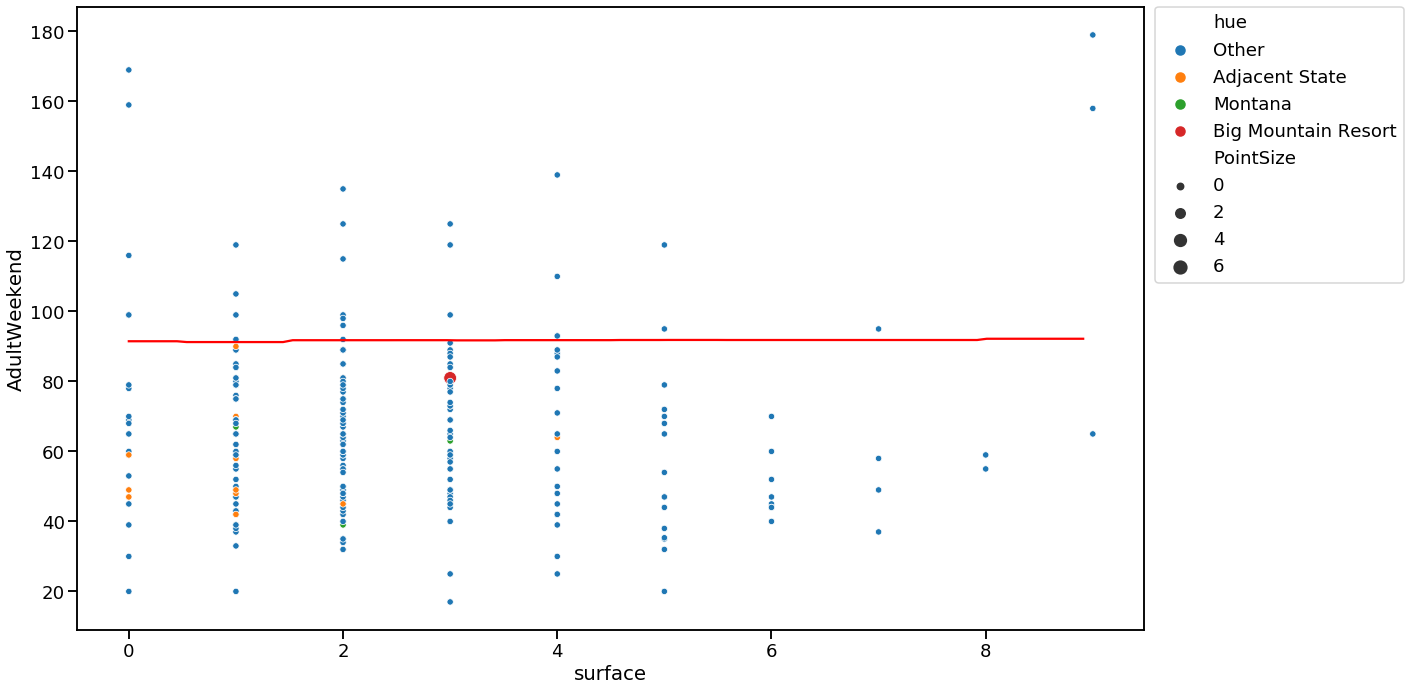

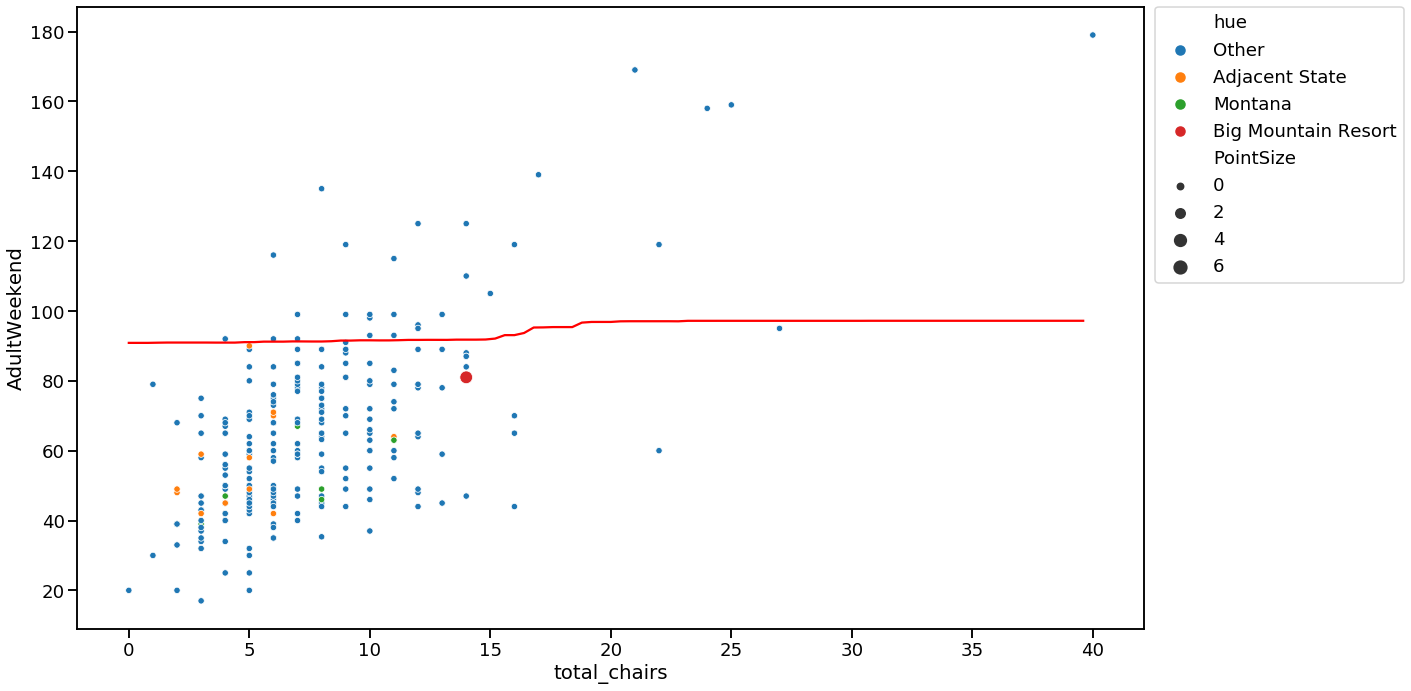

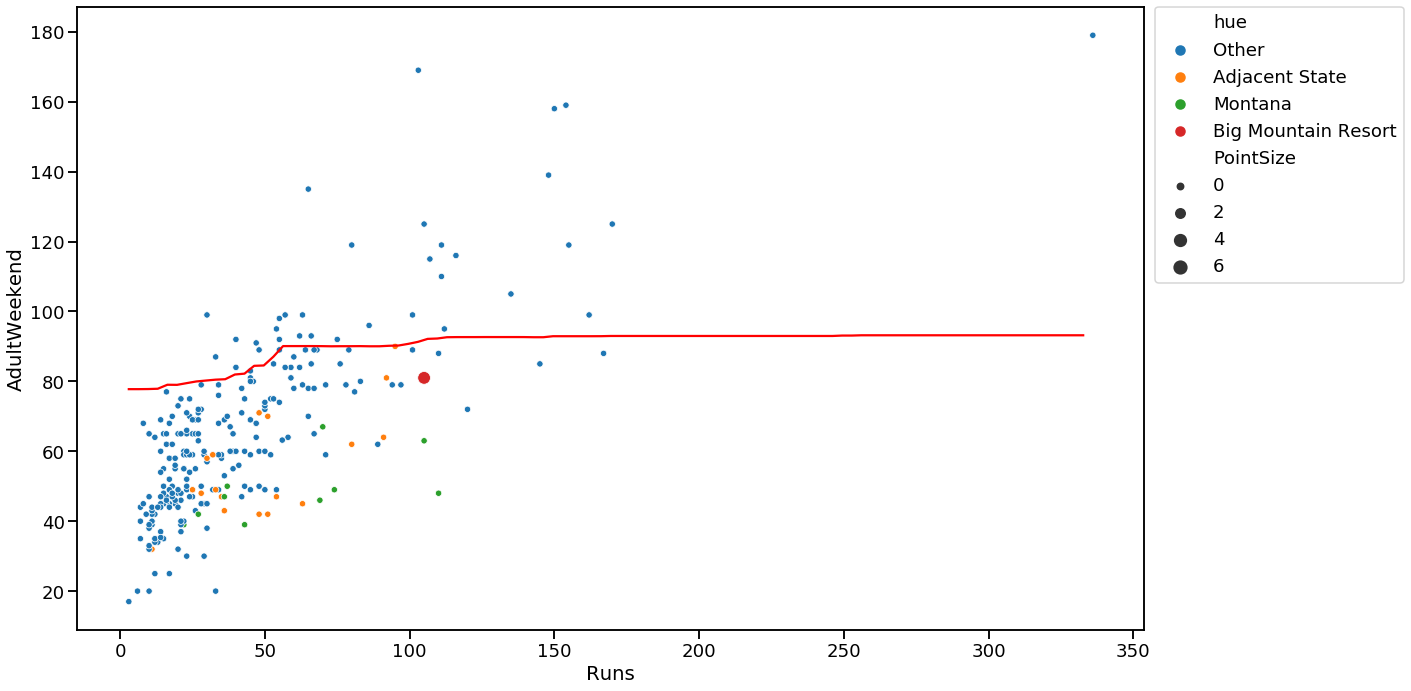

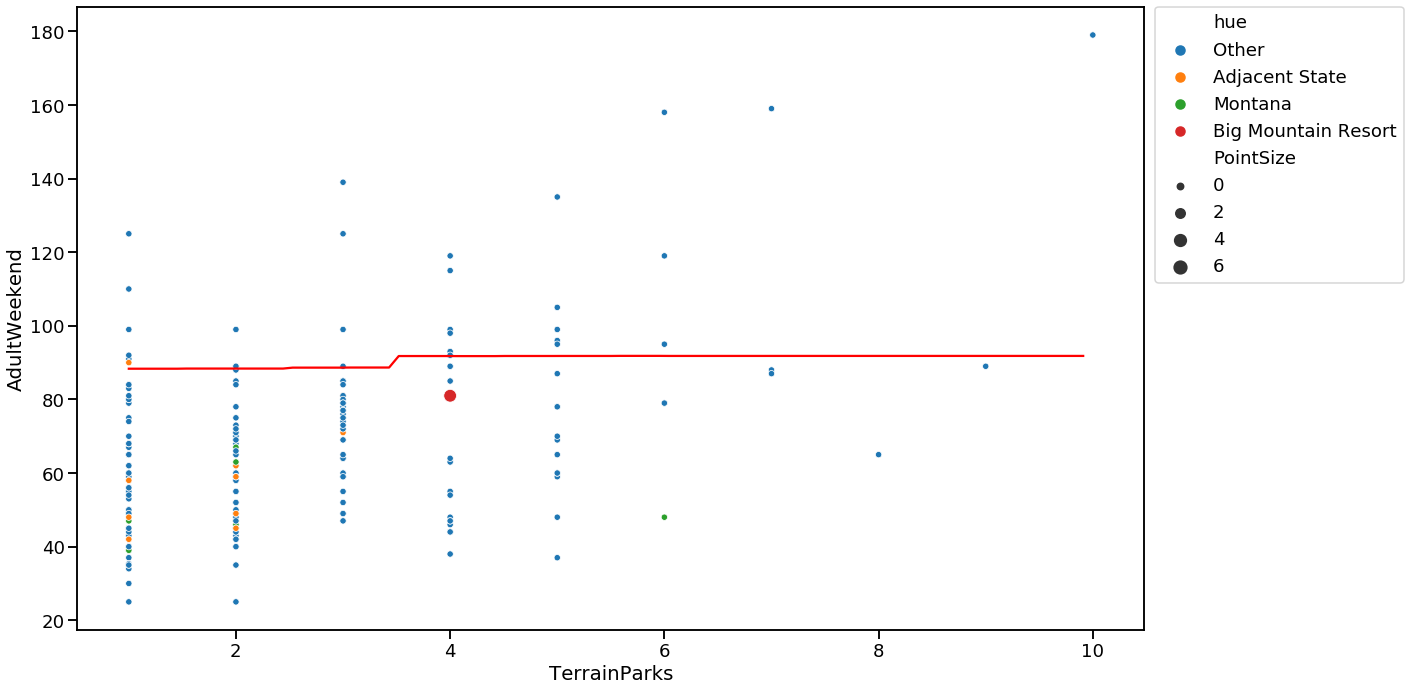

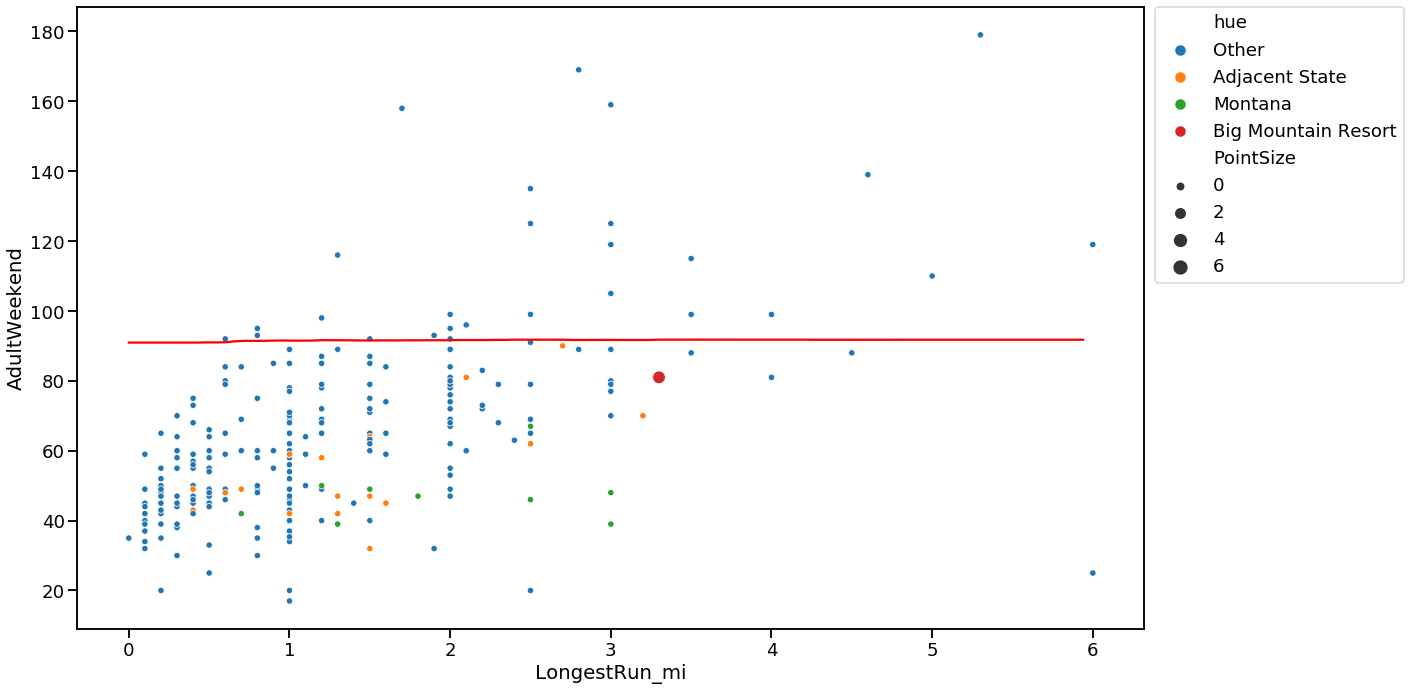

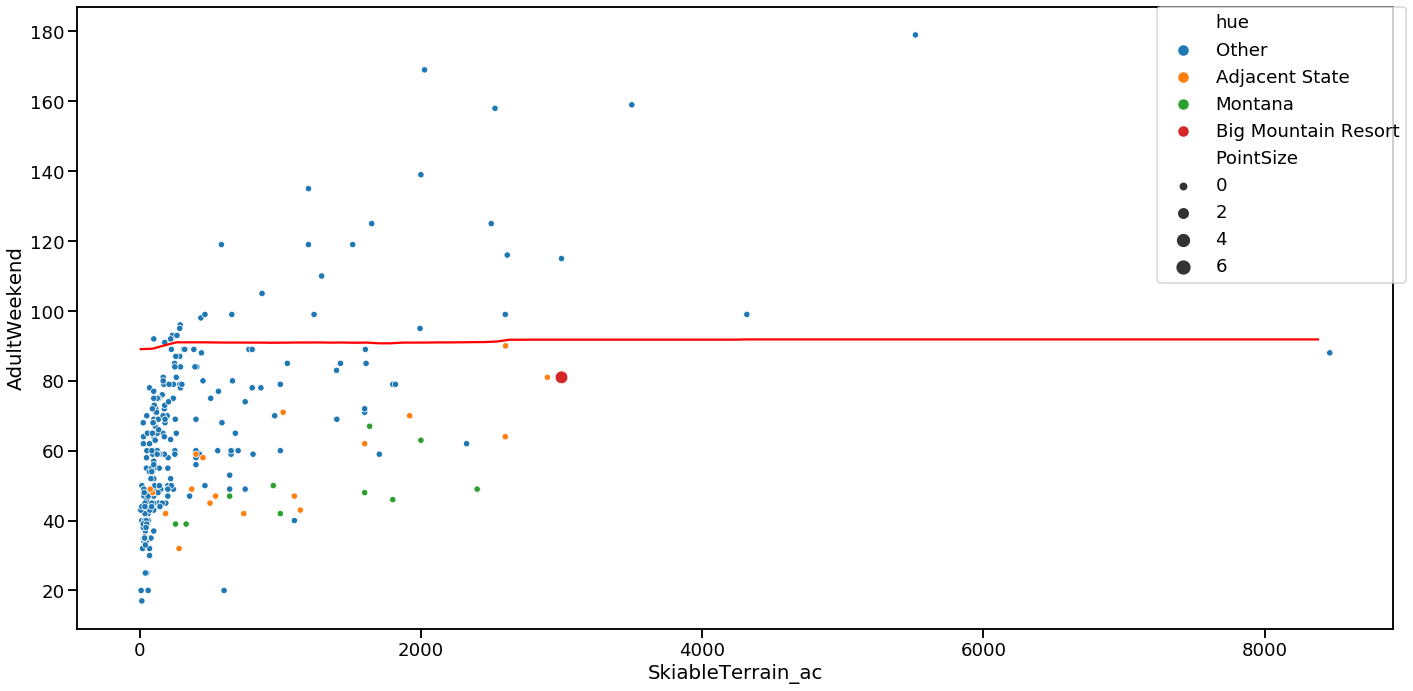

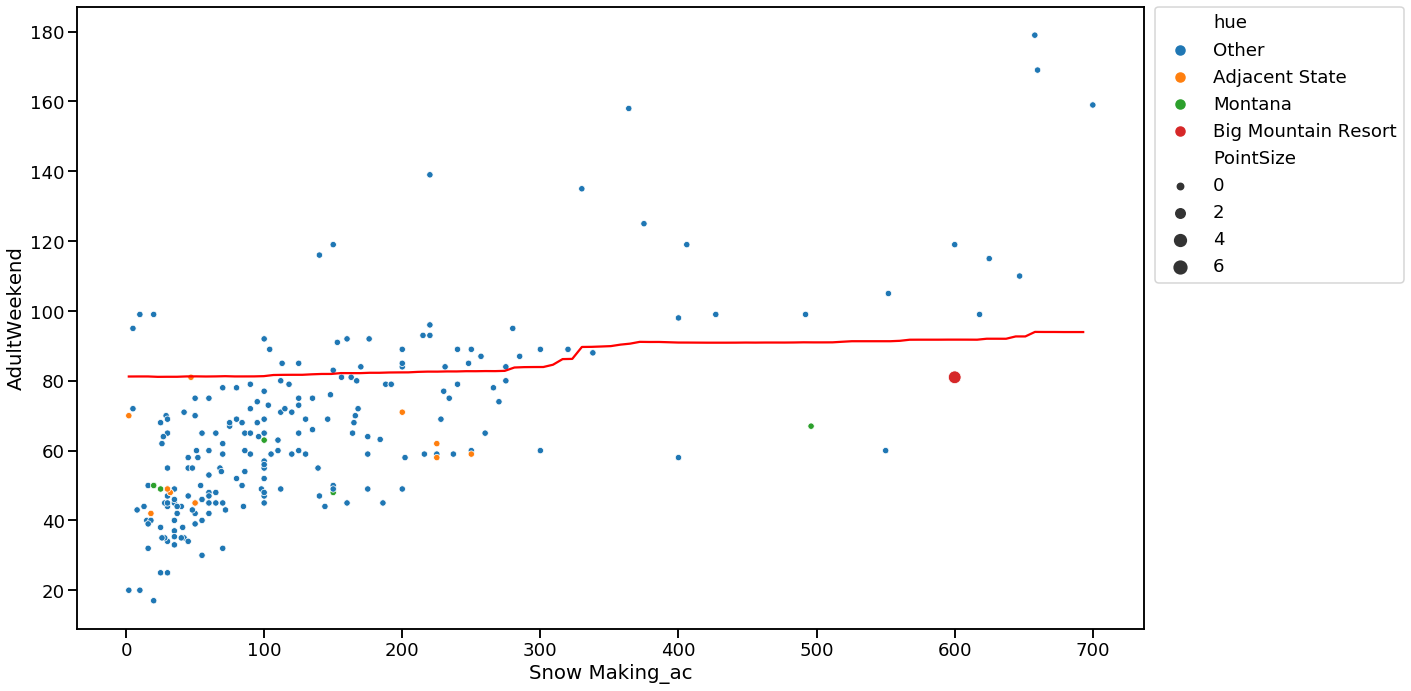

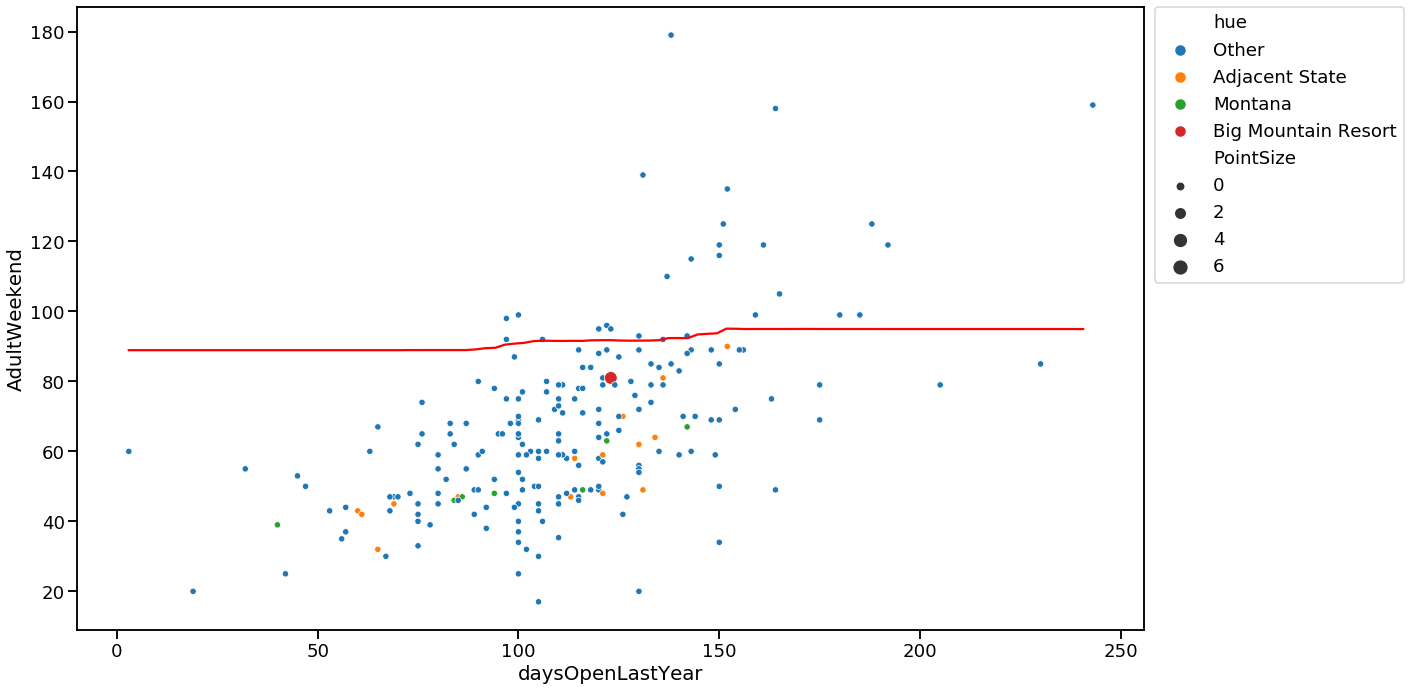

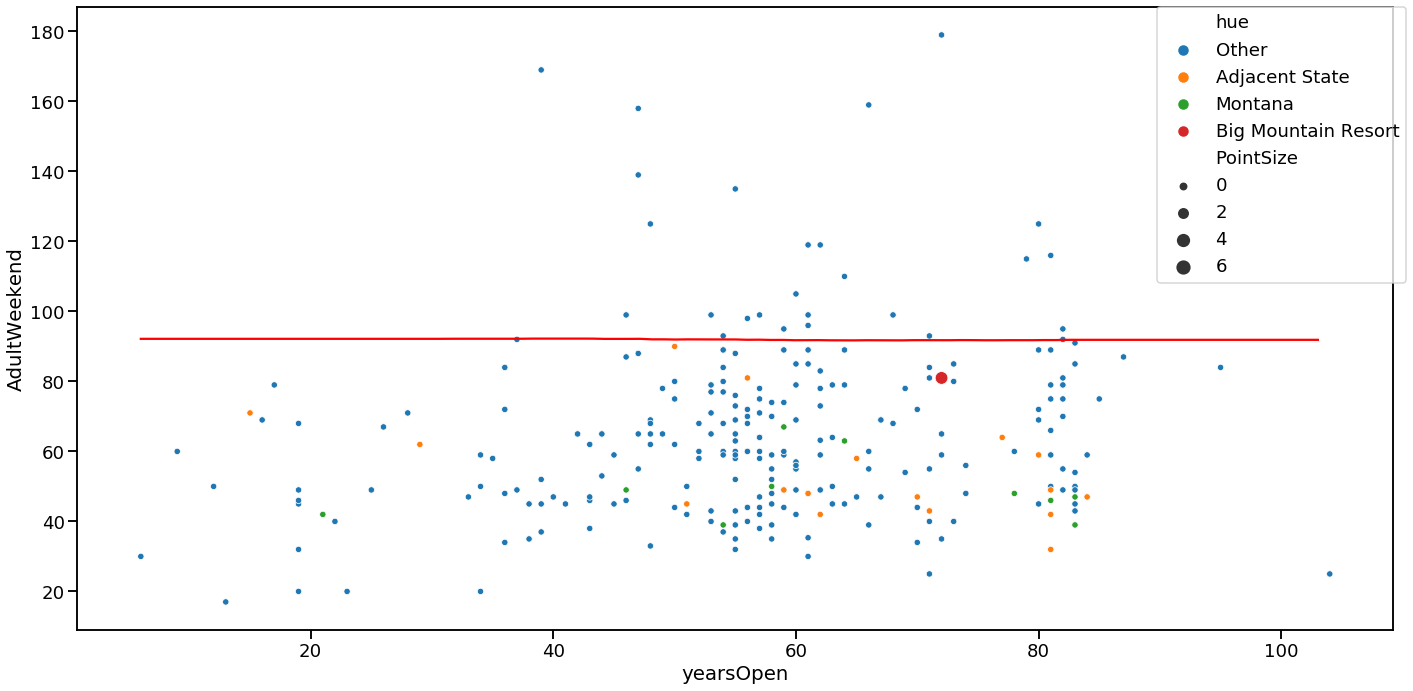

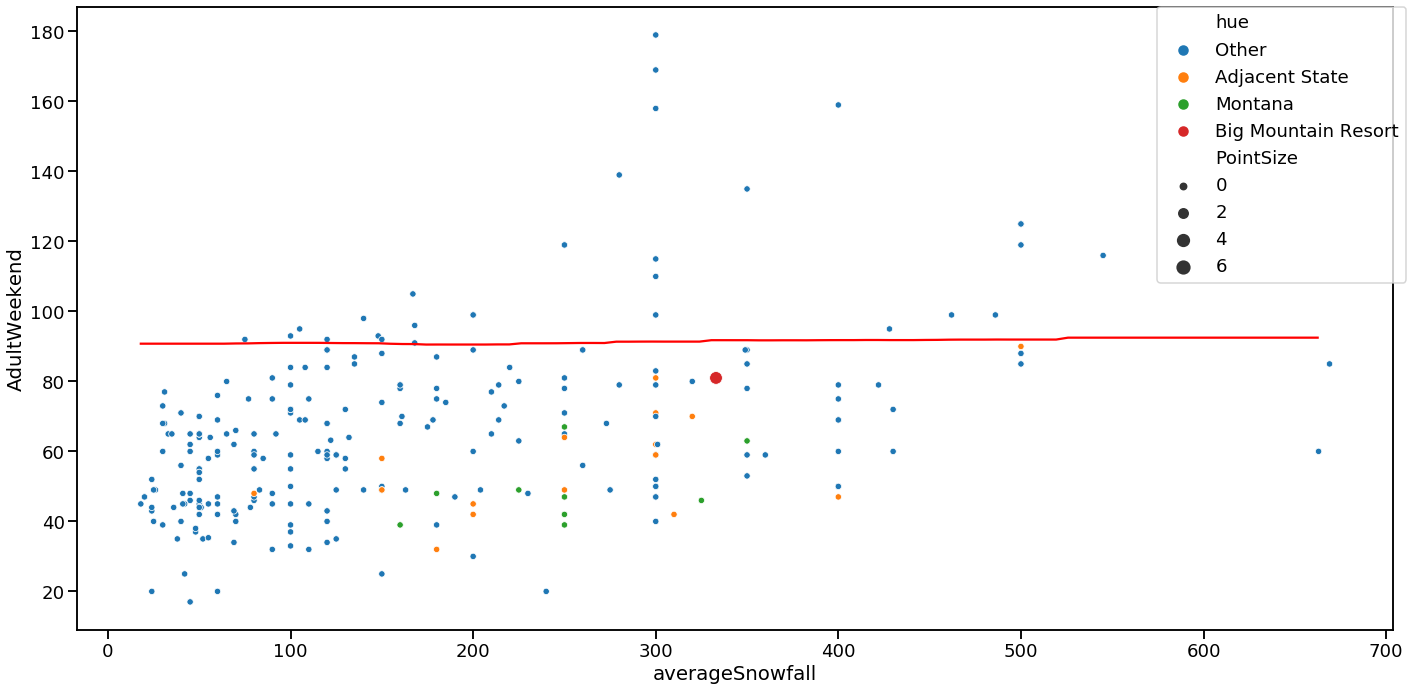

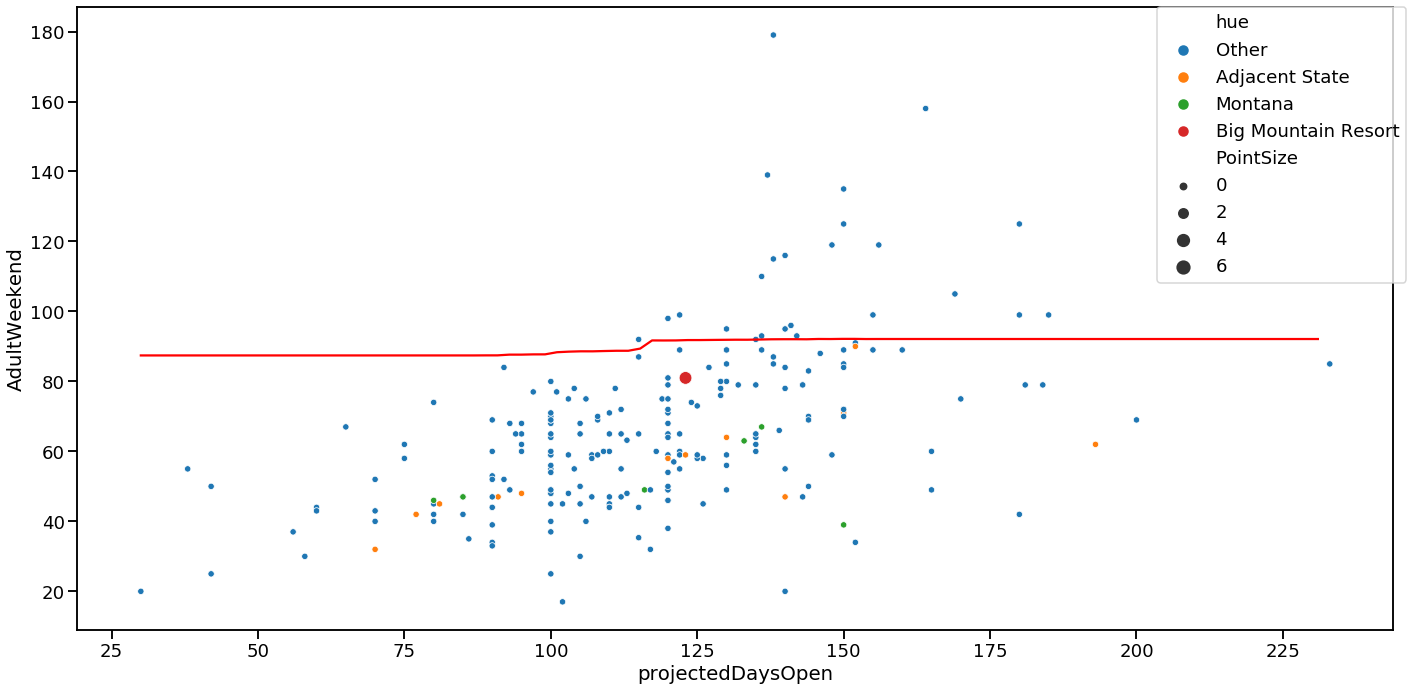

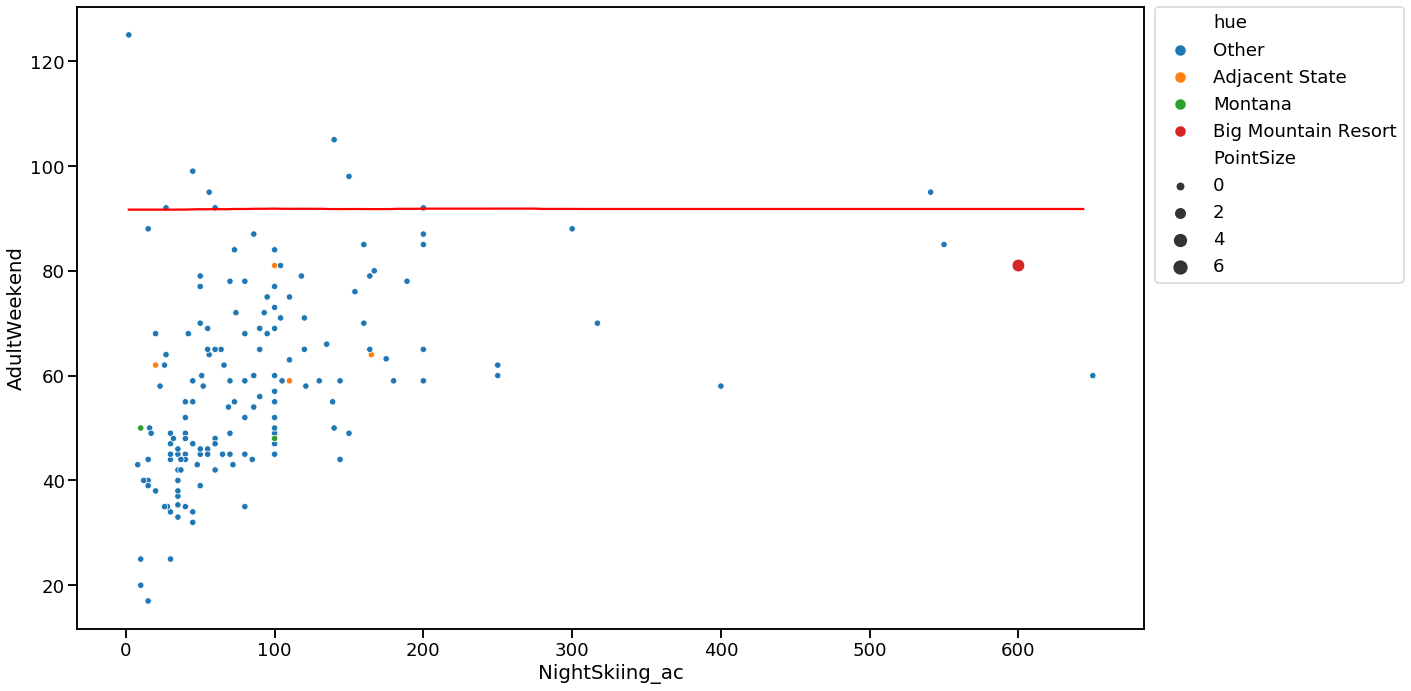

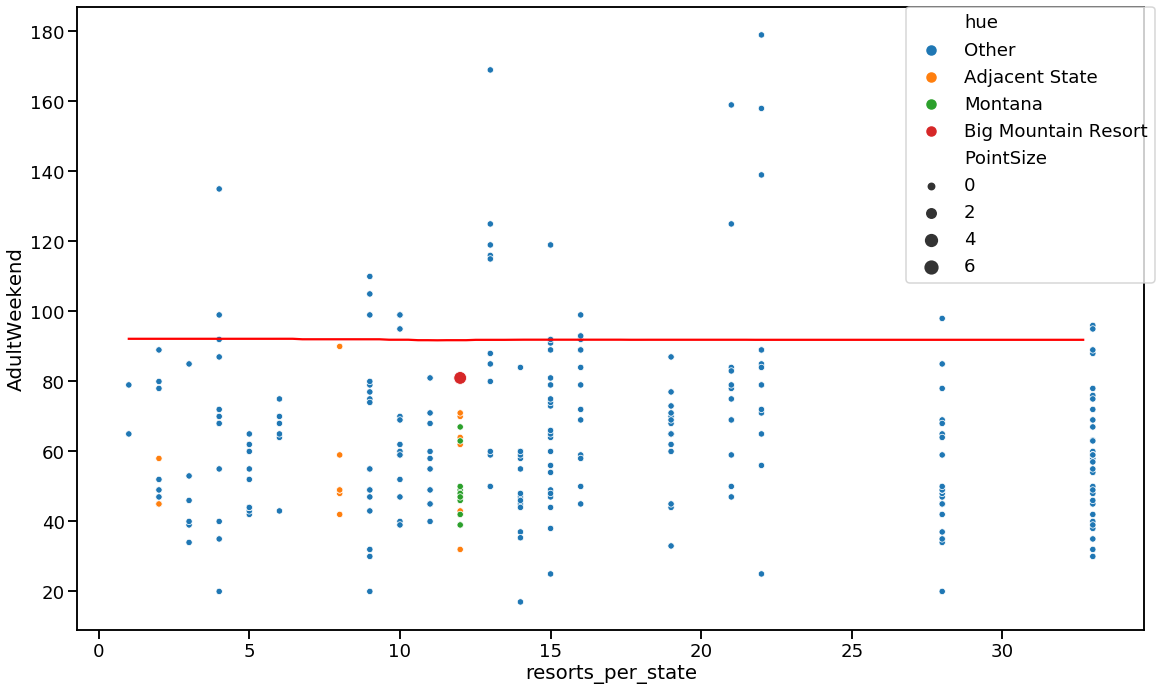

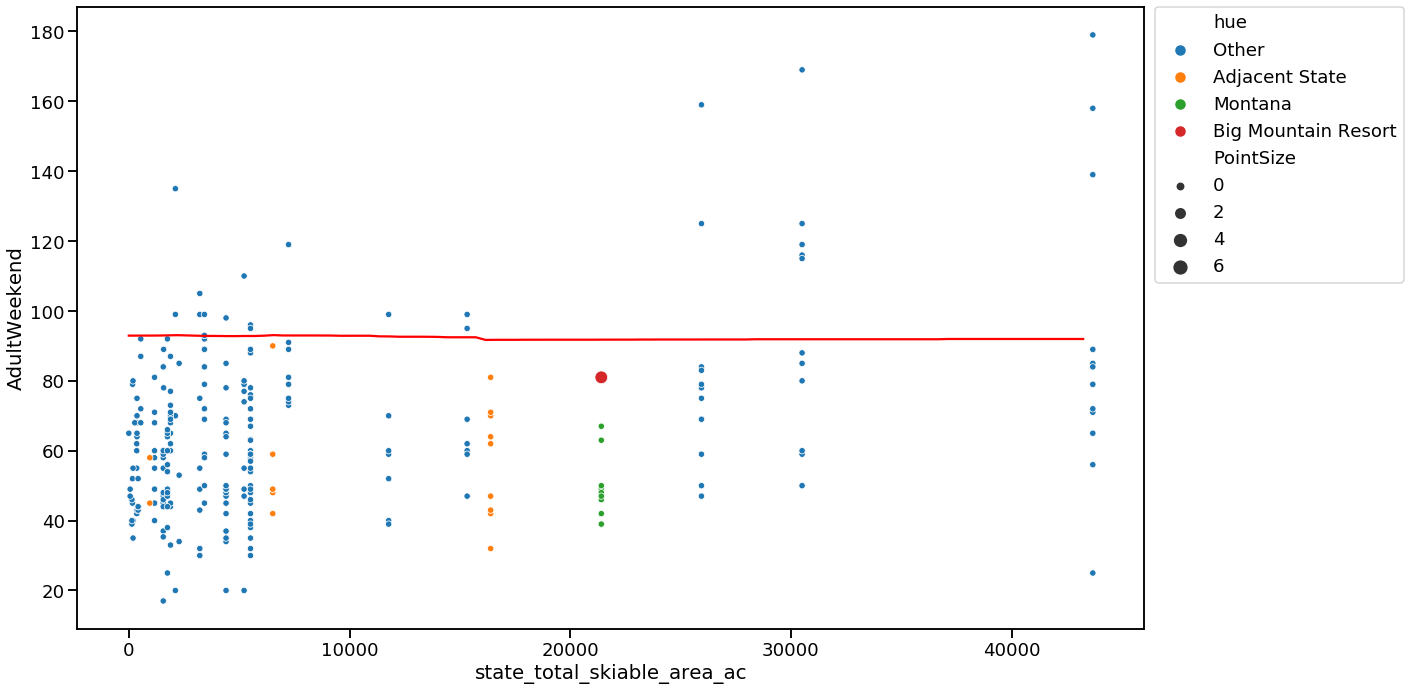

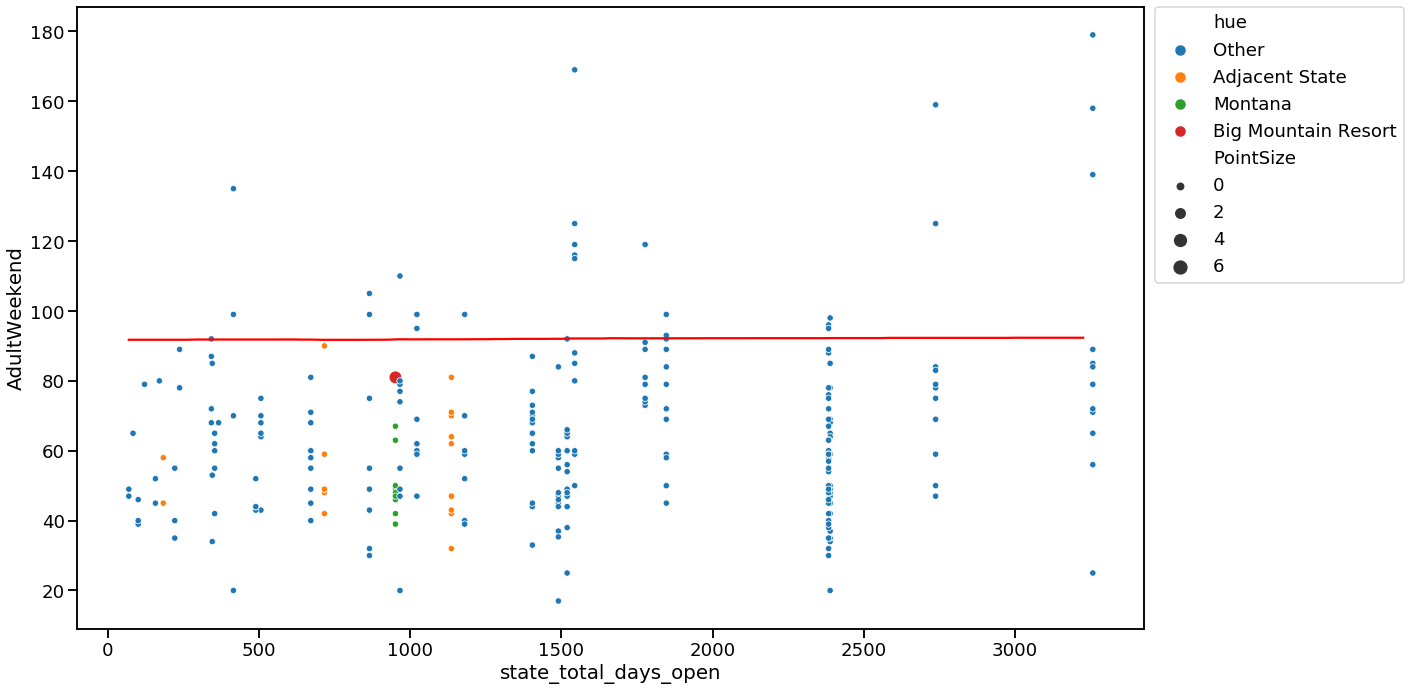

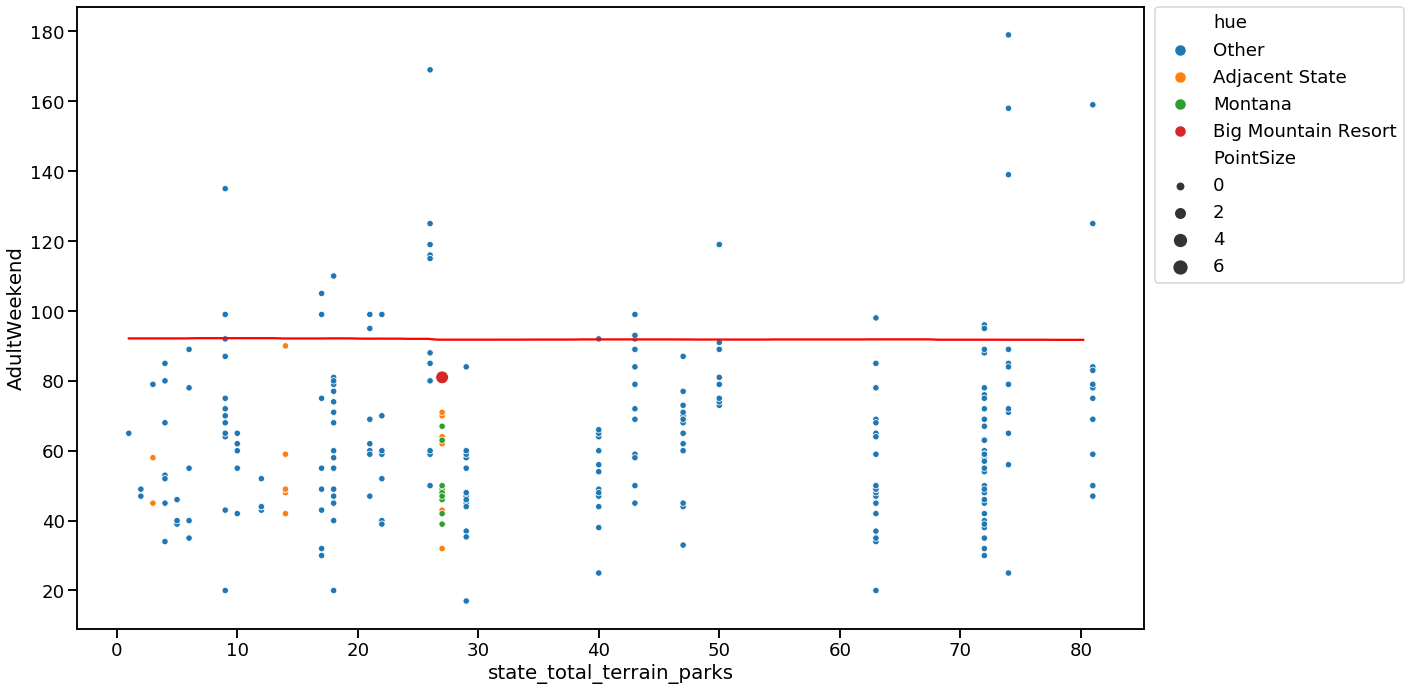

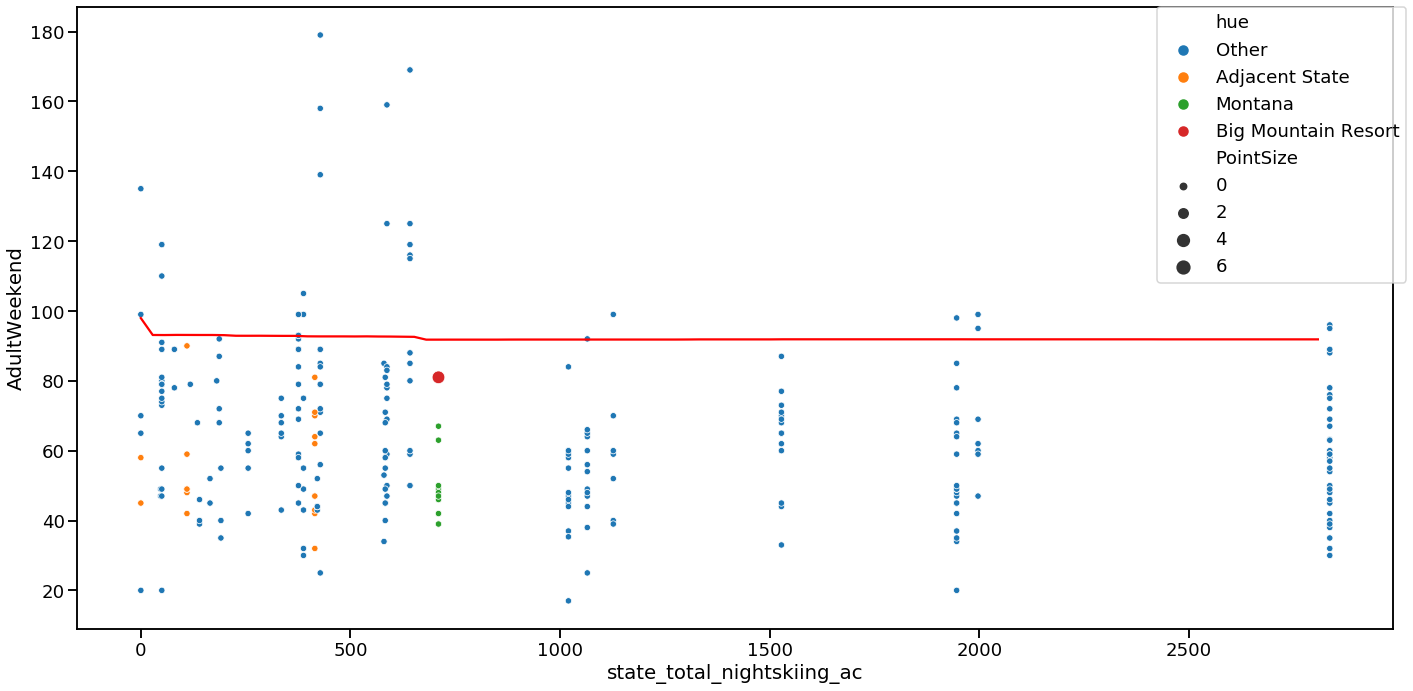

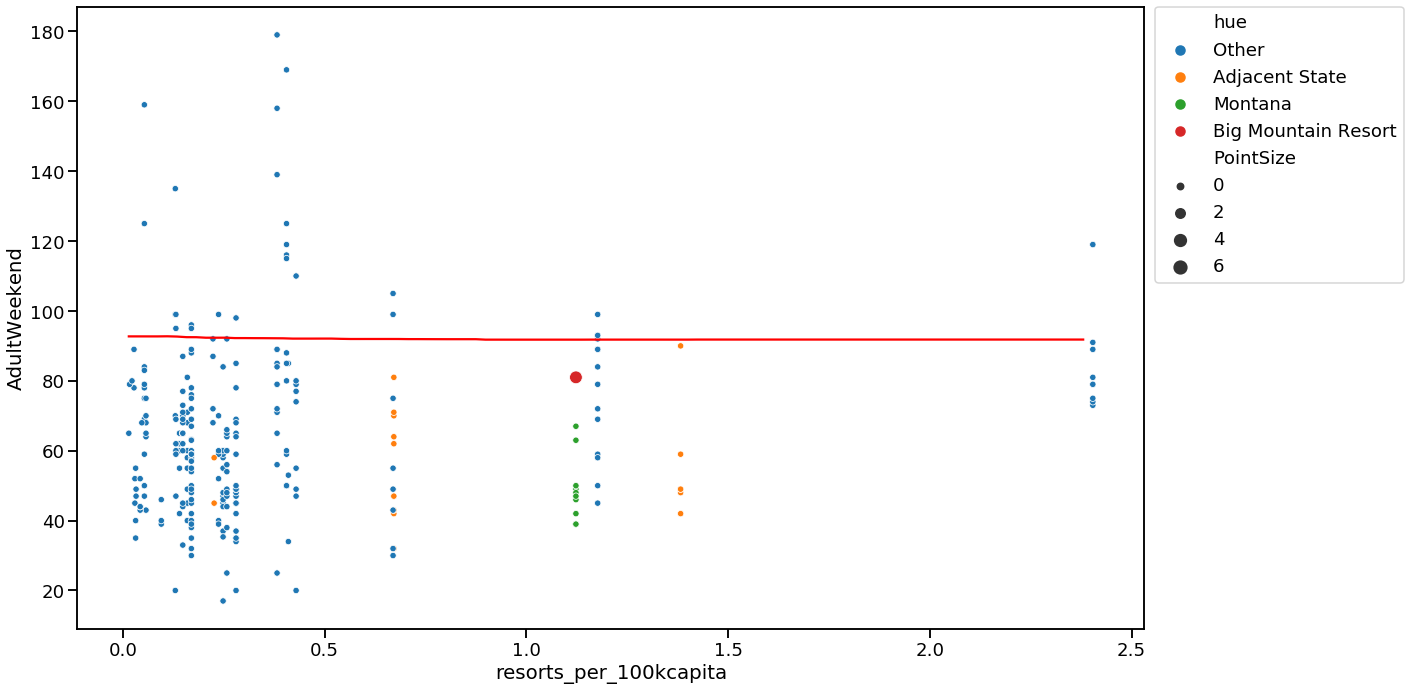

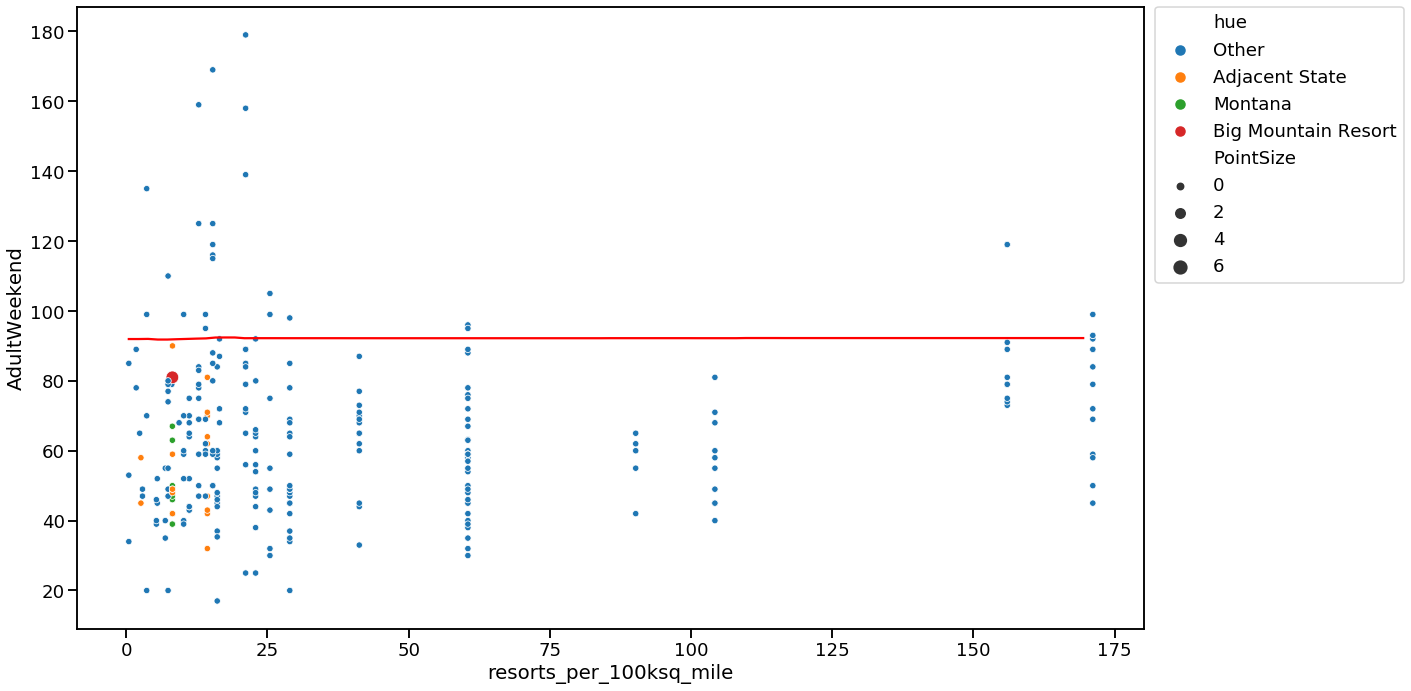

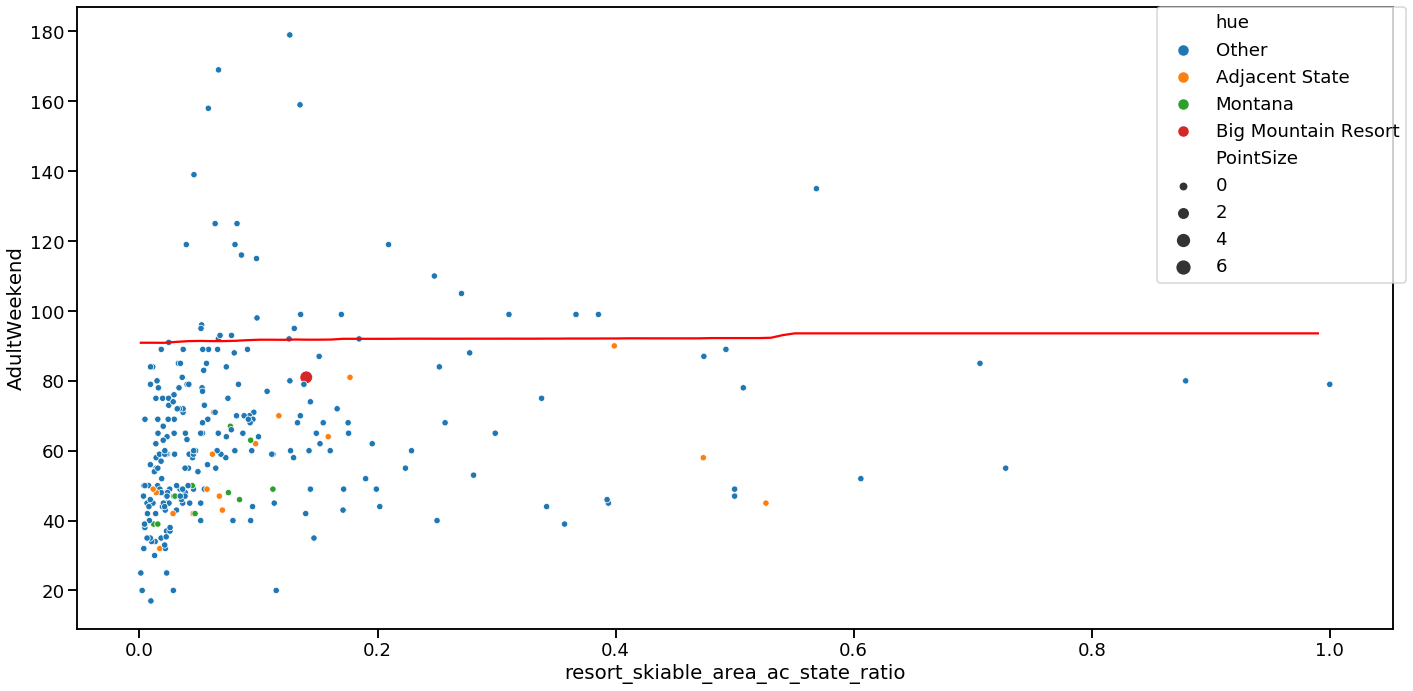

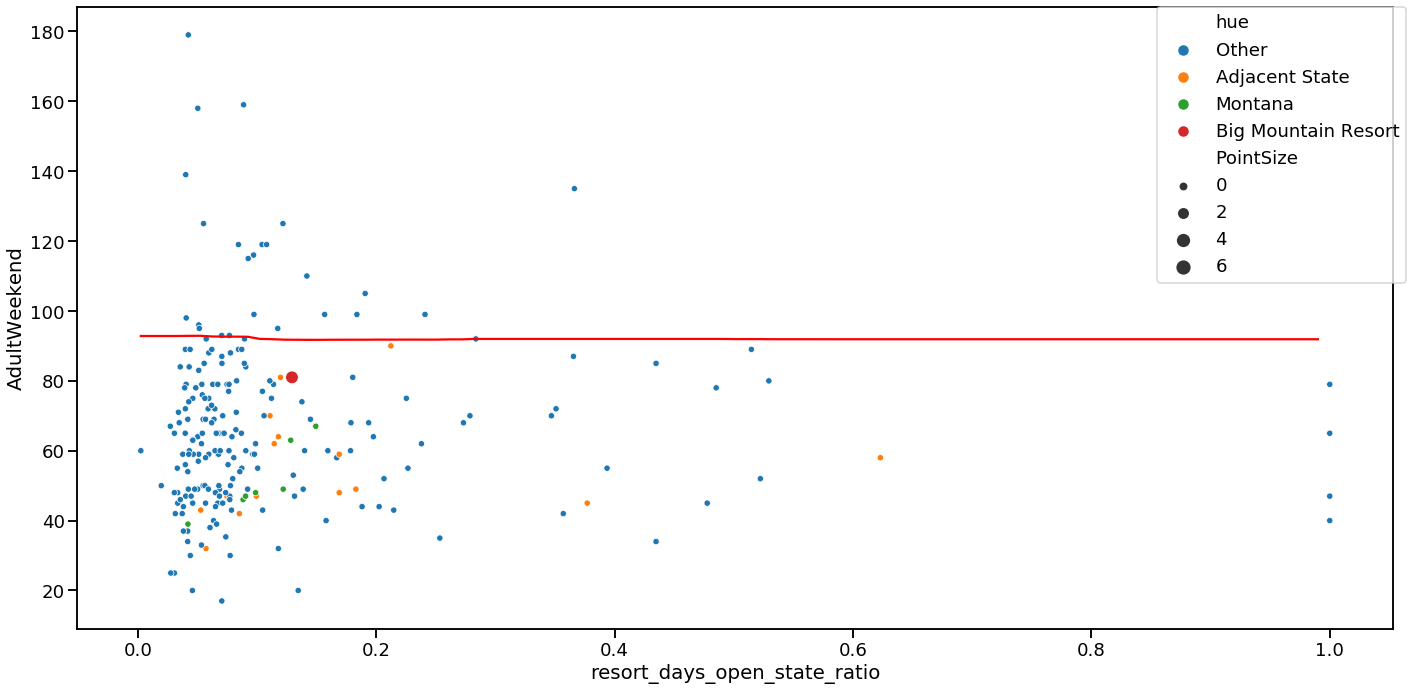

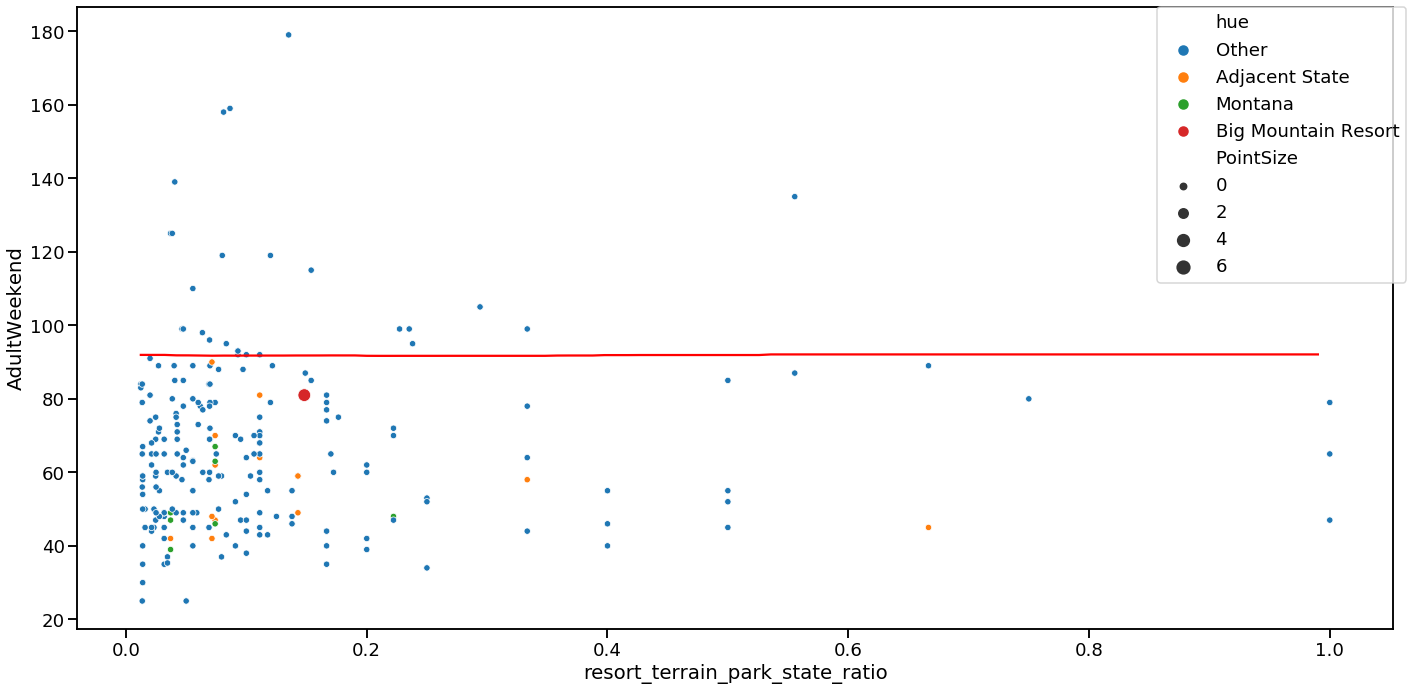

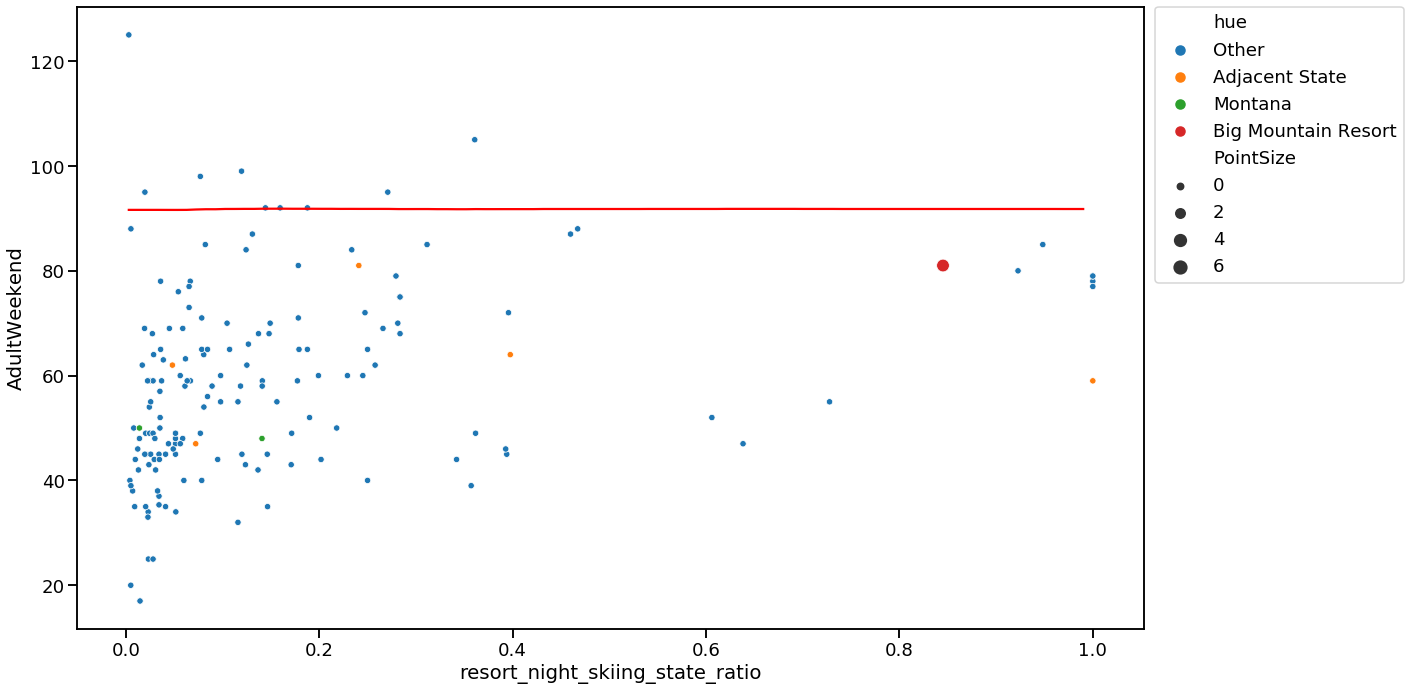

In [17]:
# Plot all model features
for col in model.X_columns:
    plotPrice(col)